# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Yudistira Dwi Permana
- **Email:** yudisdwi02@gmail.com
- **ID Dicoding:** yudisdwi

## Menentukan Pertanyaan Bisnis

- Berapa jumlah penyewaan sepeda berdasarkan pengguna biasa dan yang terdaftar, dan musim mana yang penyewaannya paling tinggi?
- Begaimana jumlah pesepeda per hari selama satu minggu ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv memuat data penyewaan sepeda harian
- hour.csv memuat data penyewaan sepeda per jam.
- dataset ini memiliki informasi penting yaitu : musim, tipe pengguna, jam dan tanggal

### Assessing Data

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [ ]:
day_df.isna().sum()
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi days: ", day_df.duplicated().sum())
print("Jumlah duplikasi hours: ", hour_df.duplicated().sum())

Jumlah duplikasi days:  0
Jumlah duplikasi hours:  0


**Insight:**
- days.csv memiliki 731 data
- hour.csv memiliki 17379 data
- tidak terdapat missing value dan duplikasi data

### Cleaning Data

In [ ]:
# Convert tipe data "dteday" dari tipe object menjadi tipe "datetime"
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# mapping data season
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_name'] = hour_df['season'].map(season_map)
day_df['season_name'] = day_df['season'].map(season_map)

# mapping data cuaca
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Precipitation',
    4: 'Heavy Precipitation'
}
hour_df['weather_condition'] = hour_df['weathersit'].map(weather_map)
day_df['weather_condition'] = day_df['weathersit'].map(weather_map)

In [ ]:
# Feature Engineering
# Create new time-based features
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['day'] = hour_df['dteday'].dt.day
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()
hour_df['hour_of_day'] = hour_df['hr']

day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day
day_df['day_of_week'] = day_df['dteday'].dt.day_name()

**Insight:**
- data tanggal pada day dan hour masih memiliki tipe data objek dan mengubah tipe datanya agar bisa digunakan dalam filter tanggal
- data season dan weather pada kedua csv memiliki data yang kurang informatif diubah sesuai dengan ketentuan dataset.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Quick overview of categorical features distribution
print("Data harian berdasarkan musim:")
season_name = day_df['season_name'].value_counts()
print(season_name)

print("\nData harian berdasarkan cuaca:")
weather_condition = day_df['weather_condition'].value_counts()
print(weather_condition)

print("\nData harian berdasarkan awal pekan:")
workingday = day_df['workingday'].value_counts()
print(workingday)

print("\nData harian berdasarkan akhir pekan:")
holiday = day_df['holiday'].value_counts()
print(holiday)

Data harian berdasarkan musim:
season_name
Fall      188
Summer    184
Spring    181
Winter    178
Name: count, dtype: int64

Data harian berdasarkan cuaca:
weather_condition
Clear/Partly Cloudy    463
Mist/Cloudy            247
Light Precipitation     21
Name: count, dtype: int64

Data harian berdasarkan awal pekan:
workingday
1    500
0    231
Name: count, dtype: int64

Data harian berdasarkan akhir pekan:
holiday
0    710
1     21
Name: count, dtype: int64


**Insight:**
- Bedasarkan data diatas untuk musim tidak ada data signifikan, untuk cuaca terdapat signifikan pada cuaca hujan ringan.
- untuk pengguna di hari kerja dan awal pekan terdapat data yang signifikan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

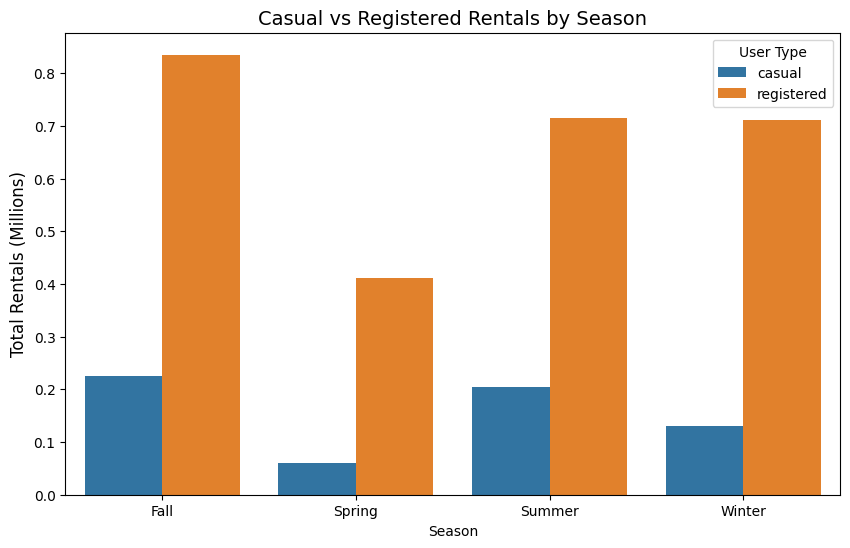

In [ ]:
# hitung total casual dan registered per season
grouped = day_df.groupby("season_name")[["casual", "registered"]].sum().reset_index()

# ubah ke long format biar bisa dipakai seaborn
long_df = grouped.melt(id_vars="season_name",
                       value_vars=["casual", "registered"],
                       var_name="User Type",
                       value_name="Total Rentals")

plt.figure(figsize=(10, 6))
sns.barplot(
    x="season_name",
    y="Total Rentals",
    hue="User Type",
    data=long_df,
    estimator=sum,
    errorbar=None
)

plt.title("Casual vs Registered Rentals by Season", fontsize=14)
plt.ylabel("Total Rentals (Millions)", fontsize=12)
plt.xlabel("Season")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

plt.legend(title="User Type")
plt.show()


### Pertanyaan 2:

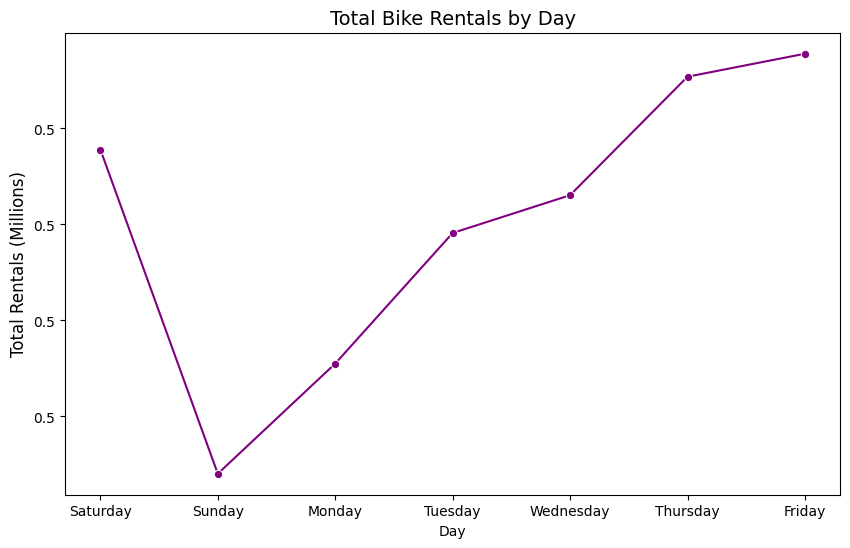

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="day_of_week",
    y="cnt",
    data=day_df,
    estimator="sum",
    errorbar=None,
    marker="o",
    color="purple"
)

plt.title("Total Bike Rentals by Day", fontsize=14)
plt.ylabel("Total Rentals (Millions)", fontsize=12)
plt.xlabel("Day")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

plt.show()

**Insight:**
- untuk pengguna yang terdaftar cenderung memiliki data yang mirip dibandingkan dengan pengguna biasa. untuk pengguna paling sedikit terdapat pada musim spring
- pengguna paling banyak menggunakan sepeda pada hari jumat, dan paling sedikit pada hari minggu.

## Analisis Lanjutan (Opsional)

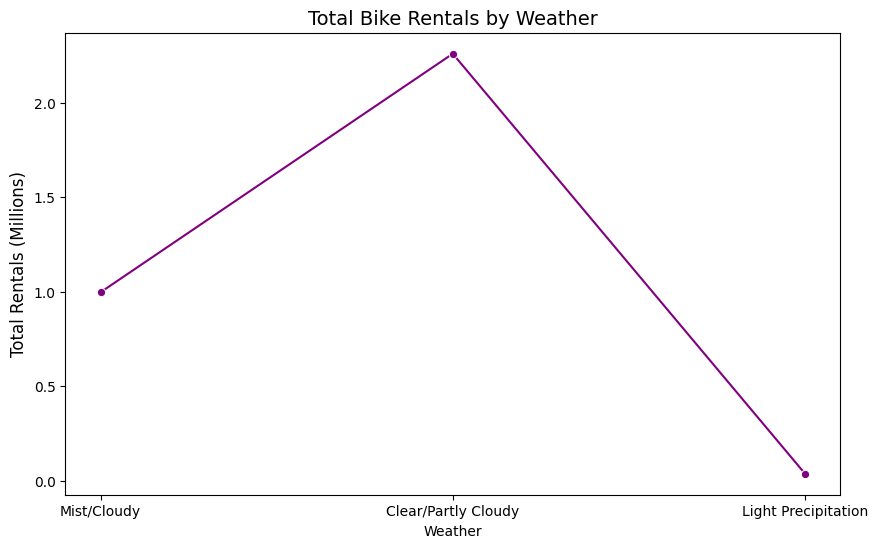

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="weather_condition",
    y="cnt",
    data=day_df,
    estimator="sum",
    errorbar=None,
    marker="o",
    color="purple"
)

plt.title("Total Bike Rentals by Weather", fontsize=14)
plt.ylabel("Total Rentals (Millions)", fontsize=12)
plt.xlabel("Weather")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

plt.show()

**Insight:**
- untuk analis lanjutan bisa melihat insight data melalu cuaca

## Conclusion

- Pengguna lebih sedikit pada musim semi(spring) dikarenakan cuaca yang tidak stabil menjadikan pengguna jarang menggunakan sepeda.
- untuk pengguna yang menggunakan rata rata menggunakan sepeda untuk menunjang pekerjaan oleh karena itu pada hari libur/minggu data penggunaan sepeda sedikit.